In [1]:
import numpy as np

In [91]:
# Inorder to create clusters of data we will first create data in a range and then concatenate and shuffle them

data_size = 3000
data_dim = 3
sub_data_size = data_size//3

# each type of data
data1 = np.random.normal(loc=(5, 4, 7), scale=(4, 4, 4), size=(sub_data_size, data_dim))
data2 = np.random.normal(loc=(10, 12, 8), scale=(3, 3, 3), size=(sub_data_size, data_dim))
data3 = np.random.normal(loc=(20, 24, 9), scale=(5, 5, 5), size=(sub_data_size, data_dim))

data = np.concatenate((data1, data2, data3), axis=0)
np.random.shuffle(data)

In [63]:
data.shape

(3000, 3)

In [64]:
import matplotlib.pyplot as plt

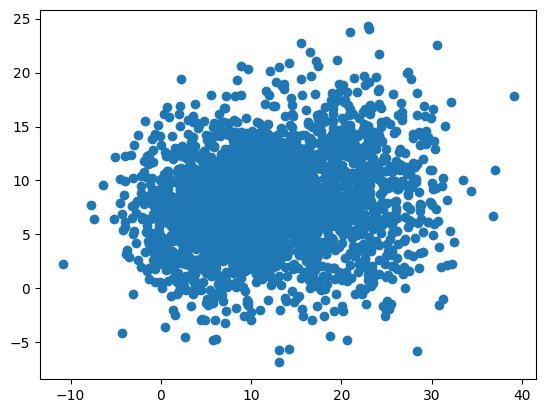

In [65]:
plt.scatter(data[:, 0], data[:, 2])

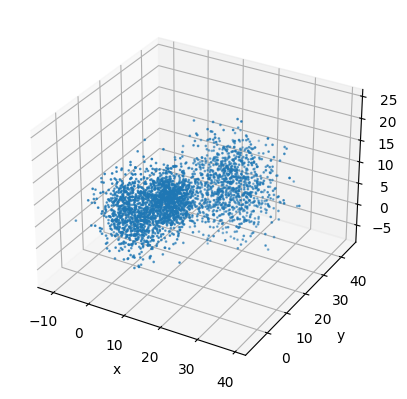

In [66]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(data[:,0], data[:,1], data[:,2], s= 0.9)
plt.show()

In [117]:
# start with a value of number of clusters
n_clusters = 4

In [197]:
# assign 3 points that will act as cluster centers
cluster_centers_start = np.take(data, np.random.choice(data_size, n_clusters, replace=False), axis=0)
cluster_centers_start


array([[14.60437672, 27.91890253,  9.89369397],
       [17.12969502, 22.67314659,  7.457582  ],
       [17.39975648, 27.26319237,  5.85428643],
       [10.81471517, 11.57997639,  6.62234725]])

In [198]:
def get_distance(point1, point2):
    diff = point1 - point2
    sum_sq = np.dot(diff.T, diff)
    return np.sqrt(sum_sq)

In [199]:

cluster_centers = cluster_centers_start

def get_point_cluster_map(n_clusters, data, cluster_centers, data_size):

    data_size = data.shape[0]
    labels = np.repeat(-1, data_size)
    # assign each data point to a cluster center

    point_cluster_map = {}
    for center in range(n_clusters):
        point_cluster_map[center] = list()

    for ipoint in range(data_size):
        # get point values
        point = data[ipoint,:]

        # empty list for distance of a point from all the clusters
        cluster_dist = list()
        for icluster_center in range(n_clusters):
            cluster_point = cluster_centers[icluster_center,:]
            # compute distance of the point from all the cluster centroids
            temp_dist = get_distance(cluster_point, point)
            cluster_dist.append(temp_dist)

        # get the cluster index of the cluster that the point is assigned to
        cluster_idx = np.argmin(cluster_dist)
        labels[ipoint] = cluster_idx
        
        # append each cluster to a cluster center
        point_cluster_map[cluster_idx].append(ipoint)
    return point_cluster_map, labels


In [200]:

def update_cluster_centers(point_cluster_map, n_clusters, data_dim):
    # Get new centroids
    # formula: cluster centers is just the mean of all the points in that cluster in the cartesian coordinate system
    updated_cluster_centers = np.zeros((n_clusters, data_dim))

    for icluster in range(n_clusters):
        ipoints_in_cluster = point_cluster_map[icluster]
        # filter points by cluster index
        points_in_cluster = np.take(data, ipoints_in_cluster, axis=0)
        updated_cluster_centers[icluster,:] = np.mean(points_in_cluster, axis=0)
    return updated_cluster_centers


In [201]:

def get_cluster_updated_cluster_center_distance(cluster_centers, updated_cluster_centers):
    cluster_center_dist = 0
    for icluster in range(n_clusters):
        temp_cluster_dist = get_distance(cluster_centers[icluster,:], updated_cluster_centers[icluster,:])
        cluster_center_dist += temp_cluster_dist
    return cluster_center_dist

In [202]:
cluster_dist_tolerance = 0.1
max_iter = 100
iter = 0
cluster_center_dist = 9999999999
cluster_distances = list()

In [203]:


while cluster_center_dist >= cluster_dist_tolerance and iter < max_iter:

    iter += 1

    point_cluster_map, labels = get_point_cluster_map(n_clusters=n_clusters,
                                                data=data,
                                                cluster_centers=cluster_centers,
                                                data_size=data_size)

    updated_cluster_centers = update_cluster_centers(point_cluster_map=point_cluster_map,
                                                    n_clusters=n_clusters,
                                                    data_dim=data_dim)

    cluster_center_dist = get_cluster_updated_cluster_center_distance(updated_cluster_centers=updated_cluster_centers,
                                                                    cluster_centers=cluster_centers)
    cluster_distances.append(cluster_center_dist)
    cluster_centers = updated_cluster_centers

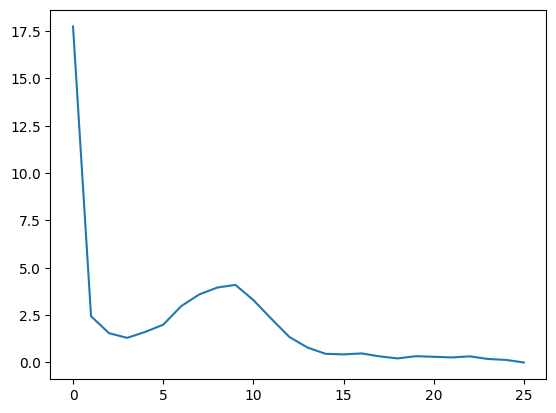

In [204]:
plt.plot(cluster_distances)

In [178]:
labels

array([2, 0, 2, ..., 2, 3, 3])

In [205]:
from kmeans import KMeans

model = KMeans(n_clusters=3)

In [206]:
model.fit(data)

In [210]:
cluster_labels = model.predict(data)

In [211]:
import pandas as pd

df = pd.DataFrame(data)
df["label"] = cluster_labels

In [212]:
df

,0,1,2,label
0,8.074036,12.457533,6.153581,0
1,2.464635,8.754613,6.052946,1
2,10.287240,13.070313,6.979008,0
3,4.206238,-1.076238,10.102999,1
4,2.158886,-1.338397,2.018191,1
...,...,...,...,...
2995,8.330816,14.308288,11.194200,0
2996,1.427818,5.383571,8.793460,1
2997,13.699697,12.110268,6.276287,0
2998,14.549589,21.685452,13.439888,2


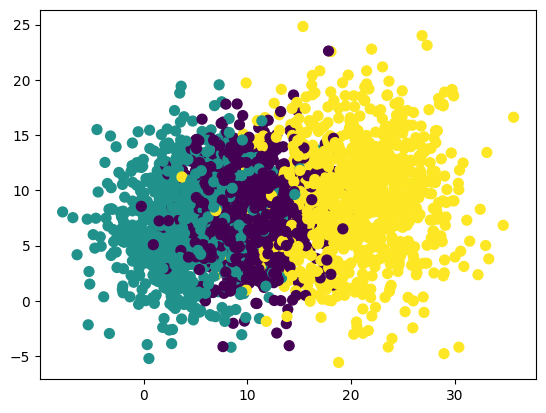

In [221]:
plt.scatter(df[0], df[2], c=df["label"],
            s=50, cmap='viridis')